## Random Forest

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Tải và đọc dữ liệu
# !gdown 1x8SWX93sFcsKSvDjfknuM3HieMq5ZUO5
data = pd.read_csv("my_xxxx.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  350 non-null    int64 
 1   Gender              350 non-null    object
 2   Experience (Years)  350 non-null    int64 
 3   Position            350 non-null    object
 4   Salary              350 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 13.8+ KB


In [4]:
# 2. Label Encoding
# Chuyển đổi các cột dữ liệu dạng chữ (có thể là cột "Gender" và "Position") sang dạng số
# bằng cách sử dụng LabelEncoder từ thư viện sklearn

# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()

# Tạo bản sao để không thay đổi dữ liệu gốc
df = data.copy()

# Encode cột Gender
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Encode cột Position
df['Position'] = label_encoder.fit_transform(df['Position'])

In [5]:
# 3. Tách dữ liệu thành danh sách các feature (X) và nhãn (y)

# Sử dụng các cột "Gender", "Experience (Years)" và "Position" làm đặc trưng đầu vào X
X = df[['Gender', 'Experience (Years)', 'Position']]

# Sử dụng cột "Salary" làm nhãn y
y = df['Salary']

print("Features (X):")
print(f"Shape của X: {X.shape}")

print("\nTarget (y):")
print(f"Shape của y: {y.shape}")


Features (X):
Shape của X: (350, 3)

Target (y):
Shape của y: (350,)


In [6]:
# 4. Tách tập dữ liệu thành tập huấn luyện và kiểm tra

# Chia dữ liệu thành tập huấn luyện (X_train, y_train) và tập kiểm tra (X_test, y_test) 
# với tỷ lệ 80:20
# Đảm bảo rằng việc chia tách dữ liệu là ngẫu nhiên với random_state=42

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,  # 20% cho test set, 80% cho train set
    random_state=42  # Đảm bảo kết quả có thể tái lặp
)

print("Kích thước tập huấn luyện:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

print("\nKích thước tập kiểm tra:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

print(f"\nTỷ lệ chia: Train {len(X_train)/len(X)*100:.1f}% - Test {len(X_test)/len(X)*100:.1f}%")


Kích thước tập huấn luyện:
X_train: (280, 3)
y_train: (280,)

Kích thước tập kiểm tra:
X_test: (70, 3)
y_test: (70,)

Tỷ lệ chia: Train 80.0% - Test 20.0%


In [7]:
# 5. Huấn luyện mô hình Random Forest và tính toán MSE và R²

# Tạo mô hình Random Forest với các tham số yêu cầu
rf_model = RandomForestRegressor(
    n_estimators=50,    # Số cây trong forest
    random_state=42     # Đảm bảo kết quả có thể tái lặp
)

# Huấn luyện mô hình trên tập train
rf_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = rf_model.predict(X_test)

# Tính toán MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Tính toán R² (R-squared)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Mean Squared Error): {mse:.4f}")
print(f"R² (R-squared): {r2:.4f}")

MSE (Mean Squared Error): 981772731.6793
R² (R-squared): 0.3121


In [8]:
# 5. Huấn luyện mô hình Random Forest và tính toán MSE và R²

loop_list = [10, 20, 50, 100]

for n_estimators in loop_list:
    # Tạo mô hình Random Forest với các tham số yêu cầu
    rf_model = RandomForestRegressor(
        n_estimators=n_estimators,    # Số cây trong forest
        random_state=42     # Đảm bảo kết quả có thể tái lặp
    )

    # Huấn luyện mô hình trên tập train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = rf_model.predict(X_test)

    # Tính toán MSE (Mean Squared Error)
    mse = mean_squared_error(y_test, y_pred)

    # Tính toán R² (R-squared)
    r2 = r2_score(y_test, y_pred)

    print("="*40)
    print(f"Kết quả đánh giá mô hình Random Forest với {n_estimators} cây:")
    print(f"MSE (Mean Squared Error): {mse:.4f}")
    print(f"R² (R-squared): {r2:.4f}")


Kết quả đánh giá mô hình Random Forest với 10 cây:
MSE (Mean Squared Error): 1120987367.6711
R² (R-squared): 0.2145
Kết quả đánh giá mô hình Random Forest với 20 cây:
MSE (Mean Squared Error): 972381168.1178
R² (R-squared): 0.3187
Kết quả đánh giá mô hình Random Forest với 50 cây:
MSE (Mean Squared Error): 981772731.6793
R² (R-squared): 0.3121
Kết quả đánh giá mô hình Random Forest với 100 cây:
MSE (Mean Squared Error): 1008555152.7152
R² (R-squared): 0.2933


In [9]:
import numpy as np

# Thử nghiệm các giá trị max_depth từ 1 đến 10
depth_list = np.arange(1, 11, 1)

# Lưu trữ kết quả để so sánh
results = []
best_mse = float('inf')
best_depth = None

for max_depth in depth_list:
    # Tạo mô hình Random Forest với max_depth thay đổi
    rf_model = RandomForestRegressor(
        n_estimators=50,        # Giữ nguyên số cây như yêu cầu trước
        max_depth=max_depth,    # Thay đổi độ sâu tối đa
        random_state=42         # Đảm bảo kết quả có thể tái lặp
    )

    # Huấn luyện mô hình trên tập train
    rf_model.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = rf_model.predict(X_test)

    # Tính toán MSE (Mean Squared Error)
    mse = mean_squared_error(y_test, y_pred)

    # Tính toán R² (R-squared)
    r2 = r2_score(y_test, y_pred)
    
    # Lưu kết quả
    results.append({
        'max_depth': max_depth,
        'mse': mse,
        'r2': r2
    })
    
    # Cập nhật MSE tốt nhất
    if mse < best_mse:
        best_mse = mse
        best_depth = max_depth

    print(f"max_depth={max_depth:2d} | MSE: {mse:10.4f} | R²: {r2:.4f}")

print("="*60)
print(f"KẾT QUẢ TỐT NHẤT:")
print(f"Độ sâu tối ưu (max_depth): {best_depth}")
print(f"MSE nhỏ nhất: {best_mse:.4f}")


max_depth= 1 | MSE: 1092850184.1442 | R²: 0.2342
max_depth= 2 | MSE: 797741806.3699 | R²: 0.4410
max_depth= 3 | MSE: 822741167.5913 | R²: 0.4235
max_depth= 4 | MSE: 799169071.1460 | R²: 0.4400
max_depth= 5 | MSE: 809807795.7298 | R²: 0.4326
max_depth= 6 | MSE: 846607220.9039 | R²: 0.4068
max_depth= 7 | MSE: 862874897.4571 | R²: 0.3954
max_depth= 8 | MSE: 909640269.1317 | R²: 0.3626
max_depth= 9 | MSE: 948740043.4976 | R²: 0.3352
max_depth=10 | MSE: 969892855.1640 | R²: 0.3204
KẾT QUẢ TỐT NHẤT:
Độ sâu tối ưu (max_depth): 2
MSE nhỏ nhất: 797741806.3699


## AdaBoost và GradientBoost

In [10]:
# Cài đặt thư viện hỗ trợ AdaBoost và GradientBoost
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

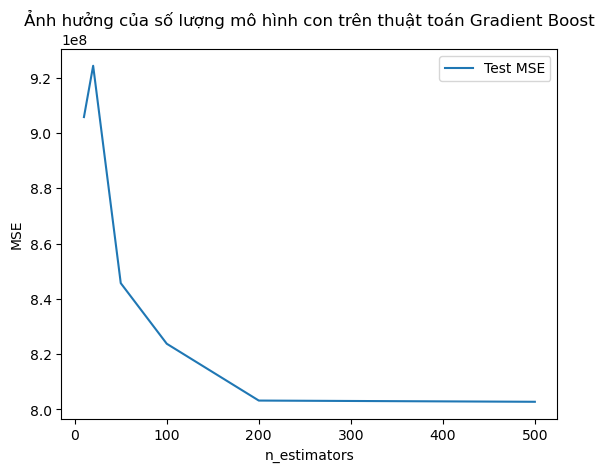

In [11]:
test_errors = []

# Danh sách các mô hình con n_estimators
n_estimators_list = [10,20,50,100,200,500]

# Khởi tạo mô hình Gradient hoặc Adaboost
for n in n_estimators_list:
    # model = GradientBoostingRegressor(n_estimators=n, learning_rate=0.1, random_state=42)
    model = AdaBoostRegressor(n_estimators=n, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)

    # Thiết lập MSE để đánh giá trực quan hóa
    test_errors.append(mean_squared_error(y_test, model.predict(X_test)))

# Trực quan hóa kết quả
plt.plot(n_estimators_list, test_errors, label="Test MSE")
plt.xlabel("n_estimators")
plt.ylabel("MSE")
plt.legend()
plt.title("Ảnh hưởng của số lượng mô hình con trên thuật toán Gradient Boost")
plt.show()


lr=0.01: [936185923.2434927]
lr=0.01: [936185923.2434927, 919362749.155016]
lr=0.01: [936185923.2434927, 919362749.155016, 897689005.3933225]
lr=0.01: [936185923.2434927, 919362749.155016, 897689005.3933225, 875825136.4086665]
lr=0.01: [936185923.2434927, 919362749.155016, 897689005.3933225, 875825136.4086665, 855603230.4182162]
lr=0.01: [936185923.2434927, 919362749.155016, 897689005.3933225, 875825136.4086665, 855603230.4182162, 829792828.4811273]
lr=0.1: [905794248.9149133]
lr=0.1: [905794248.9149133, 924348677.679515]
lr=0.1: [905794248.9149133, 924348677.679515, 845706742.5220654]
lr=0.1: [905794248.9149133, 924348677.679515, 845706742.5220654, 823781269.8978912]
lr=0.1: [905794248.9149133, 924348677.679515, 845706742.5220654, 823781269.8978912, 803227976.182562]
lr=0.1: [905794248.9149133, 924348677.679515, 845706742.5220654, 823781269.8978912, 803227976.182562, 802787682.266623]
lr=0.5: [861458336.5862134]
lr=0.5: [861458336.5862134, 873582683.0408134]
lr=0.5: [861458336.5862134

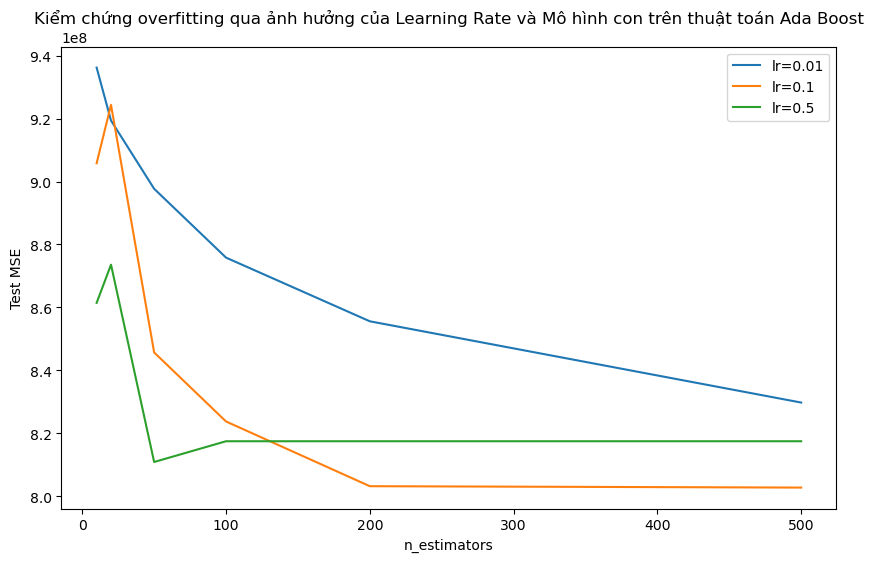

In [12]:
learning_rates = [0.01, 0.1, 0.5]
plt.figure(figsize=(10,6))

for lr in learning_rates:
    test_errors = []
    # Danh sách các mô hình con n_estimators
    n_estimators_list = [10,20,50,100,200,500]

    # Khởi tạo mô hình Gradient hoặc Adaboost
    for n in n_estimators_list:
        # model = GradientBoostingRegressor(n_estimators=n, learning_rate=lr, random_state=42)
        model = AdaBoostRegressor(n_estimators=n, learning_rate=lr, random_state=42)
        model.fit(X_train, y_train)

        # Thiết lập MSE để đánh giá trực quan hóa
        test_errors.append(mean_squared_error(y_test, model.predict(X_test)))
        print(f"lr={lr}:", test_errors)
    plt.plot(n_estimators_list, test_errors, label=f"lr={lr}")

plt.xlabel("n_estimators")
plt.ylabel("Test MSE")
plt.legend()
# plt.title("Kiểm chứng overfitting qua ảnh hưởng của Learning Rate và Mô hình con trên thuật toán Gradient Boost")
plt.title("Kiểm chứng overfitting qua ảnh hưởng của Learning Rate và Mô hình con trên thuật toán Ada Boost")
plt.show()

In [13]:
grad_regressor = GradientBoostingRegressor(n_estimators=50, random_state=42)
grad_regressor.fit(X_train, y_train)

ada_regressor = AdaBoostRegressor(n_estimators=50, random_state=42)
ada_regressor.fit(X_train, y_train)

AdaBoostRegressor(random_state=42)

In [14]:
importances_grad = grad_regressor.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances_grad})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

              Feature  Importance
1  Experience (Years)    0.580842
2            Position    0.410666
0              Gender    0.008493


In [15]:
# Tính MSE và R2 cho Ada Boost
y_pred_ada = ada_regressor.predict(X_test)
print("AdaBoost Regressor Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_ada)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_ada)}")

# Tính MSE và R2 cho Gradient Boost
y_pred_gb = grad_regressor.predict(X_test)
print("Gradient Boosting Regressor Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_gb)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_gb)}")


AdaBoost Regressor Performance:
Mean Squared Error: 822155975.0926577
R^2 Score: 0.4239172660697248
Gradient Boosting Regressor Performance:
Mean Squared Error: 797328906.1114432
R^2 Score: 0.4413135341836453


## XGBoost

In [16]:
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_tree 

params = {
    "n_estimators": 50,
    "random_state": 42
}
xgb_model = XGBRegressor(**params)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=50,
             n_jobs=None, num_parallel_tree=None, ...)

In [17]:
xgbooster = xgb_model.get_booster()
importances_xgb = xgbooster.get_score(importance_type='weight')

# Convert từ dict sang dataframe
df = pd.DataFrame(list(importances_xgb.items()), columns=['Feature', 'Importance'])
print(df)

              Feature  Importance
0              Gender       289.0
1  Experience (Years)      1017.0
2            Position       828.0


c:\Users\Apollonir\miniconda3\lib\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


CalledProcessError: Command '[WindowsPath('dot'), '-Kdot', '-Tpng']' returned non-zero exit status 3221225477. [stderr: b'']

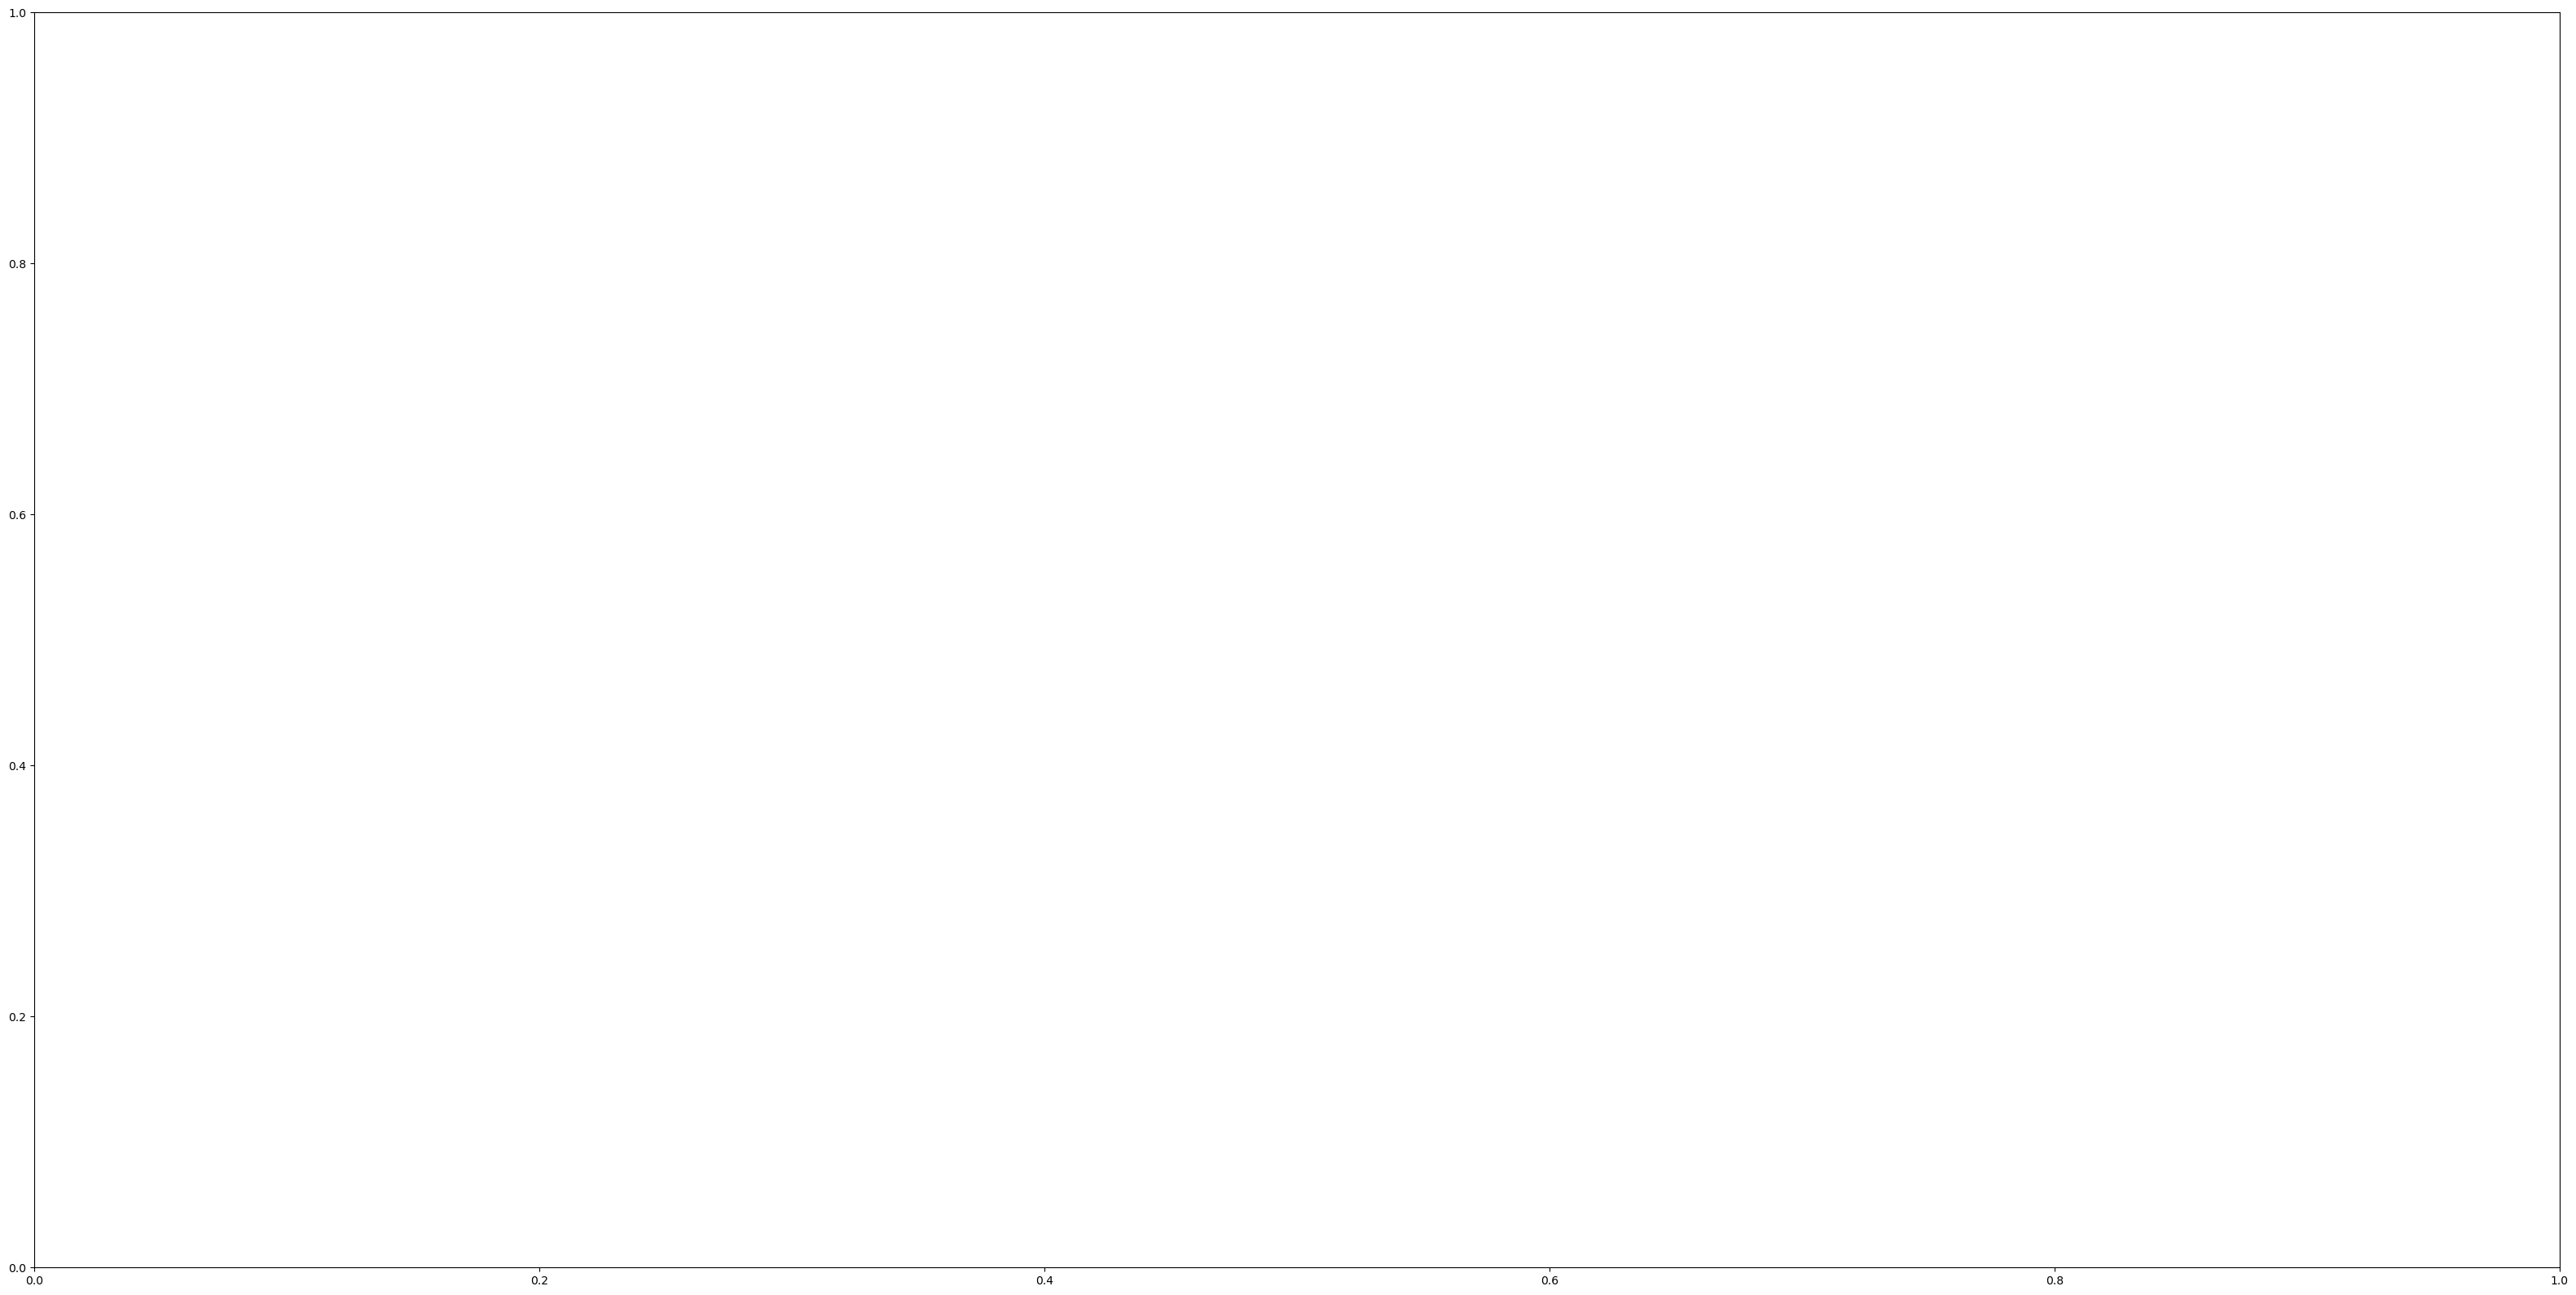

In [18]:
# Vẽ cây đầu tiên (num_trees=0)
fig, ax = plt.subplots(figsize=(40, 20))
plot_tree(xgb_model, num_trees=0, rankdir="LR", ax=ax) # bắt buộc phải có num_trees=0
ax.set_title("XGBoost - Tree 0", fontsize=16)
fig.tight_layout()
plt.show()

In [ ]:
# Cách khác: Sử dụng feature_importances_ có sẵn trong XGBRegressor
print("Feature importances từ XGBRegressor:")
feature_importances = xgb_model.feature_importances_

for i, (feature_name, importance) in enumerate(zip(feature_names, feature_importances)):
    print(f"{feature_name:20s}: {importance:.6f}")

# Tìm đặc trưng quan trọng nhất
max_idx = feature_importances.argmax()
print(f"\nĐặc trưng quan trọng nhất: {feature_names[max_idx]}")
print(f"Độ quan trọng: {feature_importances[max_idx]:.6f}")

Feature importances từ XGBRegressor:
Gender              : 0.082445
Experience (Years)  : 0.518690
Position            : 0.398865

Đặc trưng quan trọng nhất: Experience (Years)
Độ quan trọng: 0.518690


/home/apollo-falnir/miniconda3/envs/data_env/lib/python3.12/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


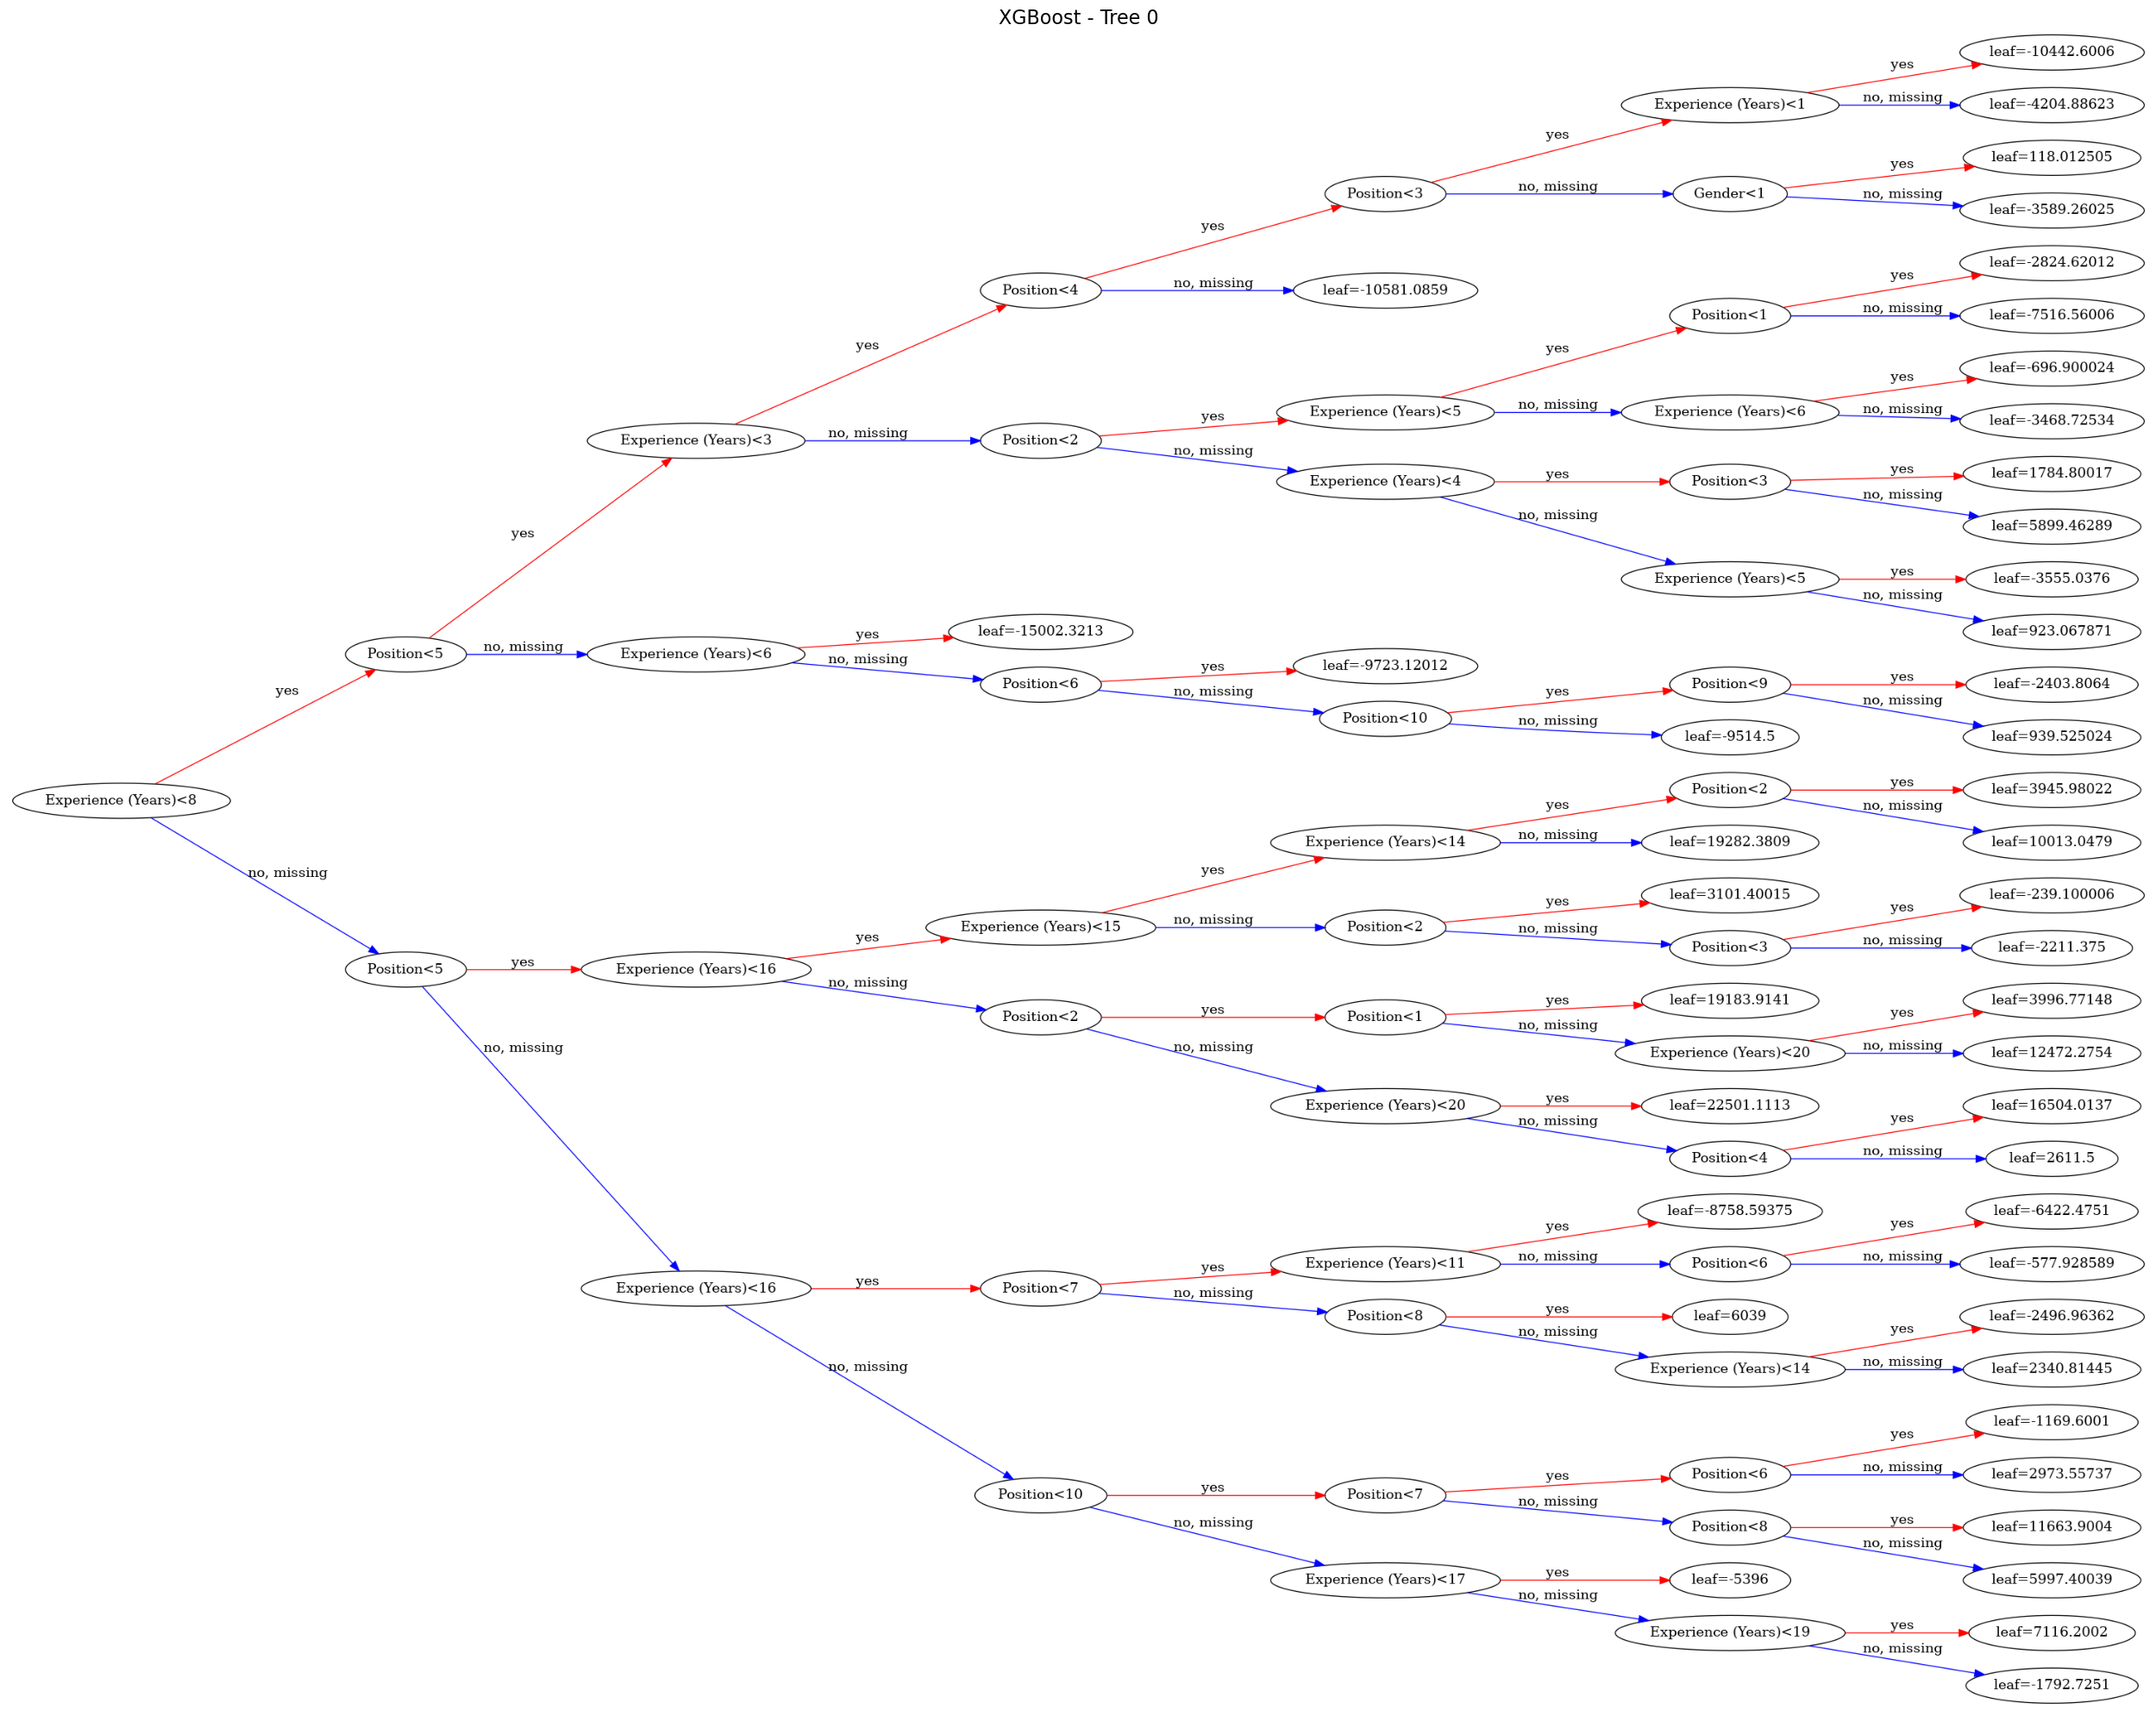

In [ ]:
# Vẽ cây đầu tiên (num_trees=0)
fig, ax = plt.subplots(figsize=(40, 20))
plot_tree(xgb_model, num_trees=0, rankdir="LR", ax=ax) # bắt buộc phải có num_trees=0
ax.set_title("XGBoost - Tree 0", fontsize=16)
fig.tight_layout()
plt.show()

In [ ]:
# Dự đoán kết quả bằng thuật toán XG Boost trên tập Test.
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Regressor Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_xgb)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_xgb)}")

XGBoost Regressor Performance:
Mean Squared Error: 1153401856.0
R^2 Score: 0.19181406497955322


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
'Random Forest': RandomForestRegressor(n_estimators=50, random_state=42),
'XGBoost': XGBRegressor(n_estimators=50, random_state=42),
'AdaBoost': AdaBoostRegressor(n_estimators=50, random_state=42),
'Gradient Boosting': GradientBoostingRegressor(n_estimators=50, random_state=42)
}

# Evaluate models
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate R^2 and MSE
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results[name] = {'R^2': r2, 'MSE': mse}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                        R^2           MSE
Random Forest      0.312074  9.817727e+08
XGBoost            0.191814  1.153402e+09
AdaBoost           0.423917  8.221560e+08
Gradient Boosting  0.441314  7.973289e+08
